# Import packages

In [1]:
import pandas as pd
import ast
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plot_label="Volume"
YONGE_LOCS_MIDDLE_POINT = (43.693963, -79.395695)

In [2]:
inci_df = pd.read_csv("../analysis/050_incidents/050_incidents.csv.zip")
inci_df["collectedAt"] = pd.to_datetime(inci_df["collectedAt"], utc=True)
inci_df["collectedAt"] = inci_df["collectedAt"].dt.floor(freq="min")
inci_df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Rename close_to_yonge_detector for future merge with count dataframe

In [3]:
inci_df.rename({"close_to_yonge_detector": "location"},inplace=True,axis=1)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


In [4]:
inci_df["events"] = inci_df["events"].apply(lambda x: ast.literal_eval(x))
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Break events in one new row per event

In [5]:
inci_df = inci_df.explode("events").reset_index()
inci_df.drop("index", axis=1, inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- I don't need "from" and "to" because I have already flagged each incident as being close to either Yonge and/or Gardiner

In [6]:
inci_df.drop(columns=["from","to"],inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Getting event description from "events"

In [7]:
inci_df["event_description"] = inci_df["events"].apply(lambda x: x['description'])
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,location,close_to_gardiner_detector,event_description
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Dropping "iconCategory" and "events" in favour of more detailed "event_description"

In [8]:
inci_df.drop(["iconCategory", "events"], axis=1, inplace=True)
inci_df

,magnitudeOfDelay,length,delay,collectedAt,location,close_to_gardiner_detector,event_description
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Expand collectedAt for future merge

In [9]:
inci_df["month"] = inci_df.collectedAt.dt.month
inci_df["day_of_week"] = inci_df.collectedAt.dt.weekday
inci_df["hour"] = inci_df.collectedAt.dt.hour
inci_df["minute"] = inci_df.collectedAt.dt.minute
inci_df.drop("collectedAt",inplace=True,axis=1)
inci_df

,magnitudeOfDelay,length,delay,location,close_to_gardiner_detector,event_description,month,day_of_week,hour,minute
0,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,7,3,12,45
1,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,7,3,12,45
2,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,7,3,12,45
3,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,7,3,12,45
4,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,7,3,12,45
...,...,...,...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic,3,6,21,0
40633,1.0,2461.341117,127.0,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic,3,6,21,25
40634,1.0,472.289662,158.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic,3,6,21,30
40635,3.0,432.591314,136.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,3,6,21,45


- Load Yonge count data set

In [10]:
count_df = pd.read_csv("./data/yonge_count.csv.zip")
count_df["time"] = pd.to_datetime(count_df["time"], utc=True)
count_df.rename({"time": "collectedAt"},inplace=True,axis=1)
count_df

,location,collectedAt,total_count,hour,minute,month,day,day_of_week,dist_from_mid_point,is_north_from_mid_point
0,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 07:45:00+00:00,984,7,45,March,3,Tuesday,3.499076,1
1,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:00:00+00:00,1046,8,0,March,3,Tuesday,3.499076,1
2,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:15:00+00:00,1034,8,15,March,3,Tuesday,3.499076,1
3,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:30:00+00:00,1032,8,30,March,3,Tuesday,3.499076,1
4,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:45:00+00:00,934,8,45,March,3,Tuesday,3.499076,1
...,...,...,...,...,...,...,...,...,...,...
8379,MERTON ST AT YONGE ST,2022-08-24 17:00:00+00:00,468,17,0,August,24,Wednesday,0.243920,1
8380,MERTON ST AT YONGE ST,2022-08-24 17:15:00+00:00,478,17,15,August,24,Wednesday,0.243920,1
8381,MERTON ST AT YONGE ST,2022-08-24 17:30:00+00:00,422,17,30,August,24,Wednesday,0.243920,1
8382,MERTON ST AT YONGE ST,2022-08-24 17:45:00+00:00,436,17,45,August,24,Wednesday,0.243920,1


- Drop unused columns

In [11]:
count_df.drop(["hour","minute","month","day","day_of_week"],inplace=True,axis=1)
count_df

,location,collectedAt,total_count,dist_from_mid_point,is_north_from_mid_point
0,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 07:45:00+00:00,984,3.499076,1
1,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:00:00+00:00,1046,3.499076,1
2,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:15:00+00:00,1034,3.499076,1
3,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:30:00+00:00,1032,3.499076,1
4,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:45:00+00:00,934,3.499076,1
...,...,...,...,...,...
8379,MERTON ST AT YONGE ST,2022-08-24 17:00:00+00:00,468,0.243920,1
8380,MERTON ST AT YONGE ST,2022-08-24 17:15:00+00:00,478,0.243920,1
8381,MERTON ST AT YONGE ST,2022-08-24 17:30:00+00:00,422,0.243920,1
8382,MERTON ST AT YONGE ST,2022-08-24 17:45:00+00:00,436,0.243920,1


- Expand collectedAt for merge with incidents dataframe

In [12]:
count_df["month"] = count_df.collectedAt.dt.month
count_df["day_of_week"] = count_df.collectedAt.dt.weekday
count_df["hour"] = count_df.collectedAt.dt.hour
count_df["minute"] = count_df.collectedAt.dt.minute
count_df.drop("collectedAt",inplace=True,axis=1)
count_df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45
1,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0
2,LAWRENCE AVE AT YONGE ST (PX 55),1034,3.499076,1,3,1,8,15
3,LAWRENCE AVE AT YONGE ST (PX 55),1032,3.499076,1,3,1,8,30
4,LAWRENCE AVE AT YONGE ST (PX 55),934,3.499076,1,3,1,8,45
...,...,...,...,...,...,...,...,...
8379,MERTON ST AT YONGE ST,468,0.243920,1,8,2,17,0
8380,MERTON ST AT YONGE ST,478,0.243920,1,8,2,17,15
8381,MERTON ST AT YONGE ST,422,0.243920,1,8,2,17,30
8382,MERTON ST AT YONGE ST,436,0.243920,1,8,2,17,45


- Merge incidents and data set with location and distance

In [13]:
count_inci_df = pd.merge(count_df, inci_df, on=["month", "day_of_week", "hour", "minute", "location"], how="left")
count_inci_df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,close_to_gardiner_detector,event_description
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,NaN,NaN,NaN,NaN,NaN
1,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0,NaN,NaN,NaN,NaN,NaN
2,LAWRENCE AVE AT YONGE ST (PX 55),1034,3.499076,1,3,1,8,15,NaN,NaN,NaN,NaN,NaN
3,LAWRENCE AVE AT YONGE ST (PX 55),1032,3.499076,1,3,1,8,30,NaN,NaN,NaN,NaN,NaN
4,LAWRENCE AVE AT YONGE ST (PX 55),934,3.499076,1,3,1,8,45,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,MERTON ST AT YONGE ST,468,0.243920,1,8,2,17,0,NaN,NaN,NaN,NaN,NaN
8391,MERTON ST AT YONGE ST,478,0.243920,1,8,2,17,15,NaN,NaN,NaN,NaN,NaN
8392,MERTON ST AT YONGE ST,422,0.243920,1,8,2,17,30,NaN,NaN,NaN,NaN,NaN
8393,MERTON ST AT YONGE ST,436,0.243920,1,8,2,17,45,NaN,NaN,NaN,NaN,NaN


- Drop close_to_gardiner_detector because I am working with Yonge locations

In [14]:
count_inci_df.drop("close_to_gardiner_detector",inplace=True,axis=1)
count_inci_df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,event_description
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,NaN,NaN,NaN,NaN
1,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0,NaN,NaN,NaN,NaN
2,LAWRENCE AVE AT YONGE ST (PX 55),1034,3.499076,1,3,1,8,15,NaN,NaN,NaN,NaN
3,LAWRENCE AVE AT YONGE ST (PX 55),1032,3.499076,1,3,1,8,30,NaN,NaN,NaN,NaN
4,LAWRENCE AVE AT YONGE ST (PX 55),934,3.499076,1,3,1,8,45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8390,MERTON ST AT YONGE ST,468,0.243920,1,8,2,17,0,NaN,NaN,NaN,NaN
8391,MERTON ST AT YONGE ST,478,0.243920,1,8,2,17,15,NaN,NaN,NaN,NaN
8392,MERTON ST AT YONGE ST,422,0.243920,1,8,2,17,30,NaN,NaN,NaN,NaN
8393,MERTON ST AT YONGE ST,436,0.243920,1,8,2,17,45,NaN,NaN,NaN,NaN


- Load weather data set

In [15]:
weather_df = pd.read_csv("./data/weather_data.csv.zip")
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute'], axis=1, inplace=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)
weather_df["collectedAt"] = weather_df["collectedAt"].dt.floor(freq="min")
weather_df

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:00+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:00+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,10.0,2023-03-26 21:35:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73531,10.0,2023-03-26 21:40:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73532,10.0,2023-03-26 21:45:00+00:00,9.64,5.90,40,9.26,290,0,0.0,0.0,0,1,0,0,0
73533,10.0,2023-03-26 21:50:00+00:00,9.61,5.86,40,9.26,290,0,0.0,0.0,0,1,0,0,0


In [16]:
weather_df.drop("windDegree", axis=1, inplace=True)
weather_df

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:00+00:00,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:00+00:00,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,10.0,2023-03-26 21:35:00+00:00,9.77,6.07,41,9.26,0,0.0,0.0,0,1,0,0,0
73531,10.0,2023-03-26 21:40:00+00:00,9.77,6.07,41,9.26,0,0.0,0.0,0,1,0,0,0
73532,10.0,2023-03-26 21:45:00+00:00,9.64,5.90,40,9.26,0,0.0,0.0,0,1,0,0,0
73533,10.0,2023-03-26 21:50:00+00:00,9.61,5.86,40,9.26,0,0.0,0.0,0,1,0,0,0


In [17]:
weather_df["month"] = weather_df.collectedAt.dt.month
weather_df["day_of_week"] = weather_df.collectedAt.dt.weekday
weather_df["hour"] = weather_df.collectedAt.dt.hour
weather_df["minute"] = weather_df.collectedAt.dt.minute
weather_df.drop("collectedAt", axis=1, inplace=True)
weather_df

,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy,month,day_of_week,hour,minute
0,10.0,18.69,18.68,79,2.57,0,0.0,0.0,0,1,0,0,0,7,3,12,45
1,10.0,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0,7,3,12,51
2,10.0,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0,7,3,12,55
3,10.0,19.38,19.36,76,2.57,0,0.0,0.0,0,1,0,0,0,7,3,13,0
4,10.0,19.42,19.40,76,2.57,0,0.0,0.0,0,1,0,0,0,7,3,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,10.0,9.77,6.07,41,9.26,0,0.0,0.0,0,1,0,0,0,3,6,21,35
73531,10.0,9.77,6.07,41,9.26,0,0.0,0.0,0,1,0,0,0,3,6,21,40
73532,10.0,9.64,5.90,40,9.26,0,0.0,0.0,0,1,0,0,0,3,6,21,45
73533,10.0,9.61,5.86,40,9.26,0,0.0,0.0,0,1,0,0,0,3,6,21,50


- Merge count and incident data set with weather data set

In [18]:
df = count_inci_df.merge(weather_df,on=["month","day_of_week","hour","minute"],how="left")
df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,...,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,NaN,NaN,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,NaN,NaN,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,NaN,NaN,...,66.0,6.69,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0,NaN,NaN,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0,NaN,NaN,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,MERTON ST AT YONGE ST,401,0.243920,1,8,2,18,0,NaN,NaN,...,67.0,4.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23159,MERTON ST AT YONGE ST,401,0.243920,1,8,2,18,0,NaN,NaN,...,57.0,1.34,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23160,MERTON ST AT YONGE ST,401,0.243920,1,8,2,18,0,NaN,NaN,...,66.0,4.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23161,MERTON ST AT YONGE ST,401,0.243920,1,8,2,18,0,NaN,NaN,...,58.0,1.34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
df.drop("location", axis=1, inplace=True)
df

,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,...,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,984,3.499076,1,3,1,7,45,NaN,NaN,NaN,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,984,3.499076,1,3,1,7,45,NaN,NaN,NaN,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,984,3.499076,1,3,1,7,45,NaN,NaN,NaN,...,66.0,6.69,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1046,3.499076,1,3,1,8,0,NaN,NaN,NaN,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1046,3.499076,1,3,1,8,0,NaN,NaN,NaN,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,401,0.243920,1,8,2,18,0,NaN,NaN,NaN,...,67.0,4.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23159,401,0.243920,1,8,2,18,0,NaN,NaN,NaN,...,57.0,1.34,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23160,401,0.243920,1,8,2,18,0,NaN,NaN,NaN,...,66.0,4.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23161,401,0.243920,1,8,2,18,0,NaN,NaN,NaN,...,58.0,1.34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
df.isna().any()

total_count                False
dist_from_mid_point        False
is_north_from_mid_point    False
month                      False
day_of_week                False
hour                       False
minute                     False
magnitudeOfDelay            True
length                      True
delay                       True
event_description           True
visibility                  True
temperature                 True
FeelsLike                   True
humidity                    True
windSpeed                   True
cloudsAll                   True
rain1h                      True
snow1h                      True
cloudy                      True
clear                       True
atmosphere                  True
snowy                       True
rainy                       True
dtype: bool

- Fill missing values

In [21]:
df["magnitudeOfDelay"].fillna(0,inplace=True)
df["length"].fillna(0,inplace=True)
df["delay"].fillna(0,inplace=True)
df["event_description"].fillna("No incidents",inplace=True)
df

,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,...,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,984,3.499076,1,3,1,7,45,0.0,0.0,0.0,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,984,3.499076,1,3,1,7,45,0.0,0.0,0.0,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,984,3.499076,1,3,1,7,45,0.0,0.0,0.0,...,66.0,6.69,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1046,3.499076,1,3,1,8,0,0.0,0.0,0.0,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1046,3.499076,1,3,1,8,0,0.0,0.0,0.0,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,67.0,4.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23159,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,57.0,1.34,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23160,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,66.0,4.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23161,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,58.0,1.34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
df[df.isna().any(axis=1)]

,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,...,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
1380,253,2.059800,1,5,2,7,45,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1381,336,2.059800,1,5,2,8,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,332,2.059800,1,5,2,8,15,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,354,2.059800,1,5,2,8,30,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,361,2.059800,1,5,2,8,45,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14102,357,3.760684,0,6,3,17,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14103,318,3.760684,0,6,3,17,15,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14104,380,3.760684,0,6,3,17,30,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14105,331,3.760684,0,6,3,17,45,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Dropping rows with NaN. These NaN values are about weather data in time periods we have not collected

In [23]:
df.dropna(inplace=True)
df

,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,...,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,984,3.499076,1,3,1,7,45,0.0,0.0,0.0,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,984,3.499076,1,3,1,7,45,0.0,0.0,0.0,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,984,3.499076,1,3,1,7,45,0.0,0.0,0.0,...,66.0,6.69,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1046,3.499076,1,3,1,8,0,0.0,0.0,0.0,...,47.0,6.17,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1046,3.499076,1,3,1,8,0,0.0,0.0,0.0,...,78.0,9.77,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,67.0,4.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23159,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,57.0,1.34,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23160,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,66.0,4.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23161,401,0.243920,1,8,2,18,0,0.0,0.0,0.0,...,58.0,1.34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
df.columns

Index(['total_count', 'dist_from_mid_point', 'is_north_from_mid_point',
       'month', 'day_of_week', 'hour', 'minute', 'magnitudeOfDelay', 'length',
       'delay', 'event_description', 'visibility', 'temperature', 'FeelsLike',
       'humidity', 'windSpeed', 'cloudsAll', 'rain1h', 'snow1h', 'cloudy',
       'clear', 'atmosphere', 'snowy', 'rainy'],
      dtype='object')

In [25]:
df.isna().any()

total_count                False
dist_from_mid_point        False
is_north_from_mid_point    False
month                      False
day_of_week                False
hour                       False
minute                     False
magnitudeOfDelay           False
length                     False
delay                      False
event_description          False
visibility                 False
temperature                False
FeelsLike                  False
humidity                   False
windSpeed                  False
cloudsAll                  False
rain1h                     False
snow1h                     False
cloudy                     False
clear                      False
atmosphere                 False
snowy                      False
rainy                      False
dtype: bool

# Plot correlations
- Between speed, day of week, hour, magnitude of delay, length, delay

- Break collectedAt into needed fields

In [26]:
data_to_correlate = df[["total_count","day_of_week","hour","magnitudeOfDelay","length","delay","visibility","temperature","humidity","windSpeed","cloudsAll","rain1h","snow1h"]]
corr_mat = data_to_correlate.corr()
corr_mat

,total_count,day_of_week,hour,magnitudeOfDelay,length,delay,visibility,temperature,humidity,windSpeed,cloudsAll,rain1h,snow1h
total_count,1.000000,-0.036599,0.188390,0.021062,0.006594,0.020719,-0.026304,-0.124296,-0.080779,0.055056,0.053637,0.008328,0.083905
day_of_week,-0.036599,1.000000,0.002488,0.045425,0.036403,0.056386,-0.083090,0.119213,-0.006522,-0.040619,-0.007375,0.030527,0.027009
hour,0.188390,0.002488,1.000000,0.056317,0.039181,0.064985,0.009334,0.201644,-0.439249,0.164439,0.032434,0.101944,0.039353
magnitudeOfDelay,0.021062,0.045425,0.056317,1.000000,0.363305,0.796194,-0.076360,-0.087805,0.048331,0.064626,0.073838,-0.005260,0.095215
length,0.006594,0.036403,0.039181,0.363305,1.000000,0.687096,-0.030745,-0.043440,0.020029,0.032588,0.038115,-0.000797,0.018599
delay,0.020719,0.056386,0.064985,0.796194,0.687096,1.000000,-0.065850,-0.083098,0.041223,0.064819,0.070356,-0.003819,0.075642
visibility,-0.026304,-0.083090,0.009334,-0.076360,-0.030745,-0.065850,1.000000,0.089241,-0.255693,0.010278,-0.114932,-0.236652,-0.068661
temperature,-0.124296,0.119213,0.201644,-0.087805,-0.043440,-0.083098,0.089241,1.000000,-0.104620,-0.414718,-0.207907,-0.033767,-0.131253
humidity,-0.080779,-0.006522,-0.439249,0.048331,0.020029,0.041223,-0.255693,-0.104620,1.000000,-0.145504,0.171696,0.109063,0.048667
windSpeed,0.055056,-0.040619,0.164439,0.064626,0.032588,0.064819,0.010278,-0.414718,-0.145504,1.000000,0.099091,0.078560,0.142208


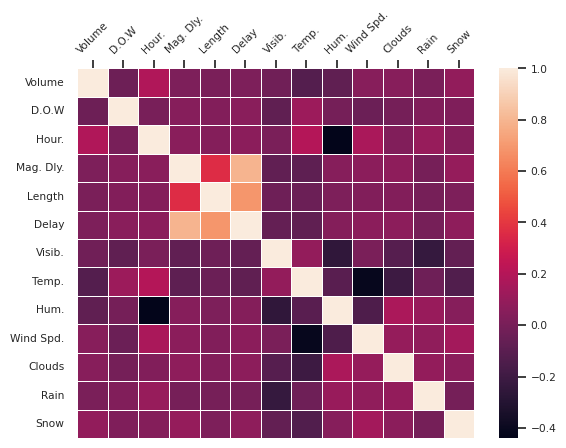

In [30]:
labels=["Volume", "D.O.W", "Hour.", "Mag. Dly.", "Length", "Delay", "Visib.", "Temp.", "Hum.", "Wind Spd.", "Clouds", "Rain", "Snow"]

sns.set(font_scale=0.7)
ax = sns.heatmap(corr_mat.to_numpy(),linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/150_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/150_correlations.png", bbox_inches="tight")
plt.savefig("./plots/150_correlations.pdf", bbox_inches="tight")

# Onehot encode categorical attributes
- Also cast all fields to float32

In [90]:
categorical_attrs = ["month","day_of_week", "event_description"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs, prefix="", prefix_sep="")
transformed_df = transformed_df.astype("float32")
transformed_df

,total_count,dist_from_mid_point,is_north_from_mid_point,hour,minute,magnitudeOfDelay,length,delay,visibility,temperature,...,Tuesday,Wednesday,Backed up traffic,Demonstration,No incidents,Obstruction on the road,Roadworks,Slow traffic,Stopped traffic,Two lanes closed
0,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,0.690000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,-2.940000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,4.290000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,0.660000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,-3.030000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.889999,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23159,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,25.280001,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23160,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.879999,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23161,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,27.840000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [91]:
transformed_df.columns

Index(['total_count', 'dist_from_mid_point', 'is_north_from_mid_point', 'hour',
       'minute', 'magnitudeOfDelay', 'length', 'delay', 'visibility',
       'temperature', 'FeelsLike', 'humidity', 'windSpeed', 'cloudsAll',
       'rain1h', 'snow1h', 'cloudy', 'clear', 'atmosphere', 'snowy', 'rainy',
       'August', 'December', 'February', 'January', 'July', 'March', 'October',
       'September', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'Backed up traffic', 'Demonstration', 'No incidents',
       'Obstruction on the road', 'Roadworks', 'Slow traffic',
       'Stopped traffic', 'Two lanes closed'],
      dtype='object')

In [92]:
transformed_df.rename({
    "dist_from_mid_point":"Dist. Mid. Point",
    "is_north_from_mid_point":"North of Mid. Point",
    "hour":"Hour",
    "minute":"Minute",
    "magnitudeOfDelay":"Mag. of Delay",
    "length":"Length",
    "delay":"Delay",
    "visibility":"Visibility",
    "temperature":"Temperature",
    "FeelsLike":"Feels Like",
    "humidity":"Humidity",
    'windSpeed':"Wind Speed",
    'cloudsAll':"Clouds All",
    'rain1h': "Rain (1h)",
    'snow1h': "Snow (1h)",
    'cloudy': "Cloudy",
    'clear': "Clear",
    'atmosphere':"Atmosphere",
    'snowy':"Snowy",
    'rainy': "Rainy",
    'Obstruction on the road': "Obst. on the road"
}, axis=1, inplace=True)
transformed_df

,total_count,Dist. Mid. Point,North of Mid. Point,Hour,Minute,Mag. of Delay,Length,Delay,Visibility,Temperature,...,Tuesday,Wednesday,Backed up traffic,Demonstration,No incidents,Obst. on the road,Roadworks,Slow traffic,Stopped traffic,Two lanes closed
0,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,0.690000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,-2.940000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,4.290000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,0.660000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,-3.030000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.889999,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23159,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,25.280001,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23160,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.879999,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23161,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,27.840000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
transformed_df.to_csv("./data/yonge_count_weather_incidents.csv.zip", index=False, compression="zip")